DTW Distance: 4.0
Optimal Path: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (4, 4), (4, 5)]


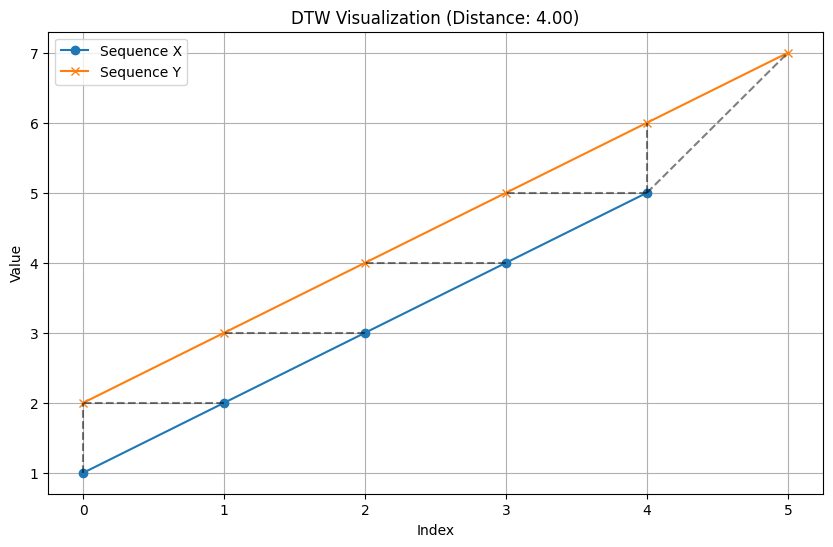

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Define two sequences
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6, 7])

# Compute DTW distance and path using fastdtw
distance, path = fastdtw(x, y, dist=lambda u, v: euclidean([u], [v]))

print(f"DTW Distance: {distance}")
print(f"Optimal Path: {path}")

# Plot the sequences
plt.figure(figsize=(10, 6))
plt.plot(x, label='Sequence X', marker='o')
plt.plot(y, label='Sequence Y', marker='x')

# Plot the optimal path
for (i, j) in path:
    plt.plot([i, j], [x[i], y[j]], 'k--', alpha=0.5)

plt.title(f"DTW Visualization (Distance: {distance:.2f})")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Example historical sequences
historical_sequences = [
    np.array([1, 2, 3, 4, 5, 6]),
    np.array([2, 3, 4, 5, 6, 7]),
    np.array([3, 4, 5, 6, 7, 8]),
]

# Known future values for each historical sequence
future_values = [7, 8, 9]

# Current incomplete sequence
current_sequence = np.array([2, 3, 4, 5])

min_distance = float('inf')
best_match_idx = -1

for idx, hist_seq in enumerate(historical_sequences):
    # Convert sequences to sequences of 1-D arrays
    seq1 = [[x] for x in current_sequence]
    seq2 = [[x] for x in hist_seq[:-1]]  # Exclude future value

    # Debugging: Print shapes and content
    print(f"Comparing with sequence {idx}:")
    print(f"Current sequence: {seq1}")
    print(f"Historical sequence: {seq2}")

    # Compute DTW
    distance, _ = fastdtw(seq1, seq2, dist=euclidean)
    print(f"Distance to sequence {idx}: {distance}")

    if distance < min_distance:
        min_distance = distance
        best_match_idx = idx

# Predict the next value using the best match
predicted_next_value = future_values[best_match_idx]
print(f"Predicted Next Value: {predicted_next_value}")


Comparing with sequence 0:
Current sequence: [[2], [3], [4], [5]]
Historical sequence: [[1], [2], [3], [4], [5]]
Distance to sequence 0: 1.0
Comparing with sequence 1:
Current sequence: [[2], [3], [4], [5]]
Historical sequence: [[2], [3], [4], [5], [6]]
Distance to sequence 1: 1.0
Comparing with sequence 2:
Current sequence: [[2], [3], [4], [5]]
Historical sequence: [[3], [4], [5], [6], [7]]
Distance to sequence 2: 4.0
Predicted Next Value: 7


: 